In [2]:
import numpy as np
import scipy
import os
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
class Processor:
    def __init__(self, folder: str):
        # Inicializa a classe Processor com um caminho específico de pasta
        # e.g.: tp_folder_path = r"C:\Users\jmlnn\OneDrive\Engenharia\0. Pesquisa DP\arquivosTP"
        self.folder = folder
        self.files_list = self.list_mat_files()

    def list_mat_files(self):
        """Lista os arquivos .mat no diretório especificado"""

        return [os.path.join(self.folder, f)
                for f in os.listdir(self.folder)
                if f.endswith('.mat')]
    
    def load_mat_file(self, data_dimension: int = 1):
        self.dict_data = {}
        for i, file in enumerate(self.files_list, 1):
            try:
                mat_data = scipy.io.loadmat(file)
                absoluto = [key for key in mat_data.keys() if not key.startswith('_')]
                
                if not absoluto:
                    print(f"Arquivo {i} não possui dados")
                    continue

                self.dict_data[f'Arquivo {i}'] = mat_data[absoluto[0]]

            except Exception as e:
                print(f"Erro ao carregar arquivo {file}: {e}")

        return self.dict_data # retorna um dicionário dos dados
    
    def plot_dados(self):
        plt.figure(figsize=(10, 6))
        for key, value in self.dict_data.items():
            dados = np.array(value[2:])
            plt.plot(dados)

        plt.xlabel('Pontos')
        plt.ylabel('Amplitude')
        plt.title('Dados dos arquivos .mat')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()

        return plt.show()

    def half_cycle(self, plot=True, title=""):
        """Separa os dados em semiciclos positivos e negativos"""

        data_pos = []
        data_neg = []

        lista = [np.array(value) for value in self.dict_data.values()]

        for i in range(len(lista)):
            linha_nula = np.zeros((1, lista[i].shape[1]))  # Cria uma linha de zeros
            lista[i] = np.vstack((lista[i], linha_nula))  # Adiciona a linha de zeros

            # Atribui 1 para semiciclo positivo e 0 para negativo
            lista[i][-1] = (lista[i][1] <= 180).astype(int)

            for k in range(lista[i].shape[1]):  # Percorre as colunas
                coluna = lista[i][:, k]  # Obtém a coluna completa
                if lista[i][-1, k] == 1:
                    data_pos.append(coluna)  # Adiciona a coluna na lista de positivos
                else:
                    data_neg.append(coluna)  # Adiciona a coluna na lista de negativos

        # Converte para arrays e remove a última linha
        data_pos = np.array(data_pos)[:, :-1]
        data_neg = np.array(data_neg)

        # Se o parâmetro `plot` for True, gerar os gráficos
        if plot and data_pos.size > 0 and data_neg.size > 0:
            plt.figure(figsize=(10, 5))
            plt.plot(data_pos[0][2:], label="Semiciclo Positivo", color="red")
            plt.plot(data_neg[0][2:], label="Semiciclo Negativo", color="blue")
            plt.xlabel("Pontos")
            plt.ylabel("Amplitude")
            plt.title(title)
            plt.legend()
            plt.grid(True)
            plt.show()

        self.data_pos = data_pos
        self.data_neg = data_neg

In [4]:
tp_folder_path = r"C:\Users\jmlnn\OneDrive\Engenharia\0. Pesquisa DP\TP_limiar_60"
tp_processor = Processor(tp_folder_path)
tp_processor.list_mat_files()

['C:\\Users\\jmlnn\\OneDrive\\Engenharia\\0. Pesquisa DP\\TP_limiar_60\\tp_22kv_condi_0.mat',
 'C:\\Users\\jmlnn\\OneDrive\\Engenharia\\0. Pesquisa DP\\TP_limiar_60\\tp_22kv_condi_1.mat',
 'C:\\Users\\jmlnn\\OneDrive\\Engenharia\\0. Pesquisa DP\\TP_limiar_60\\tp_22kv_condi_10.mat',
 'C:\\Users\\jmlnn\\OneDrive\\Engenharia\\0. Pesquisa DP\\TP_limiar_60\\tp_22kv_condi_100.mat',
 'C:\\Users\\jmlnn\\OneDrive\\Engenharia\\0. Pesquisa DP\\TP_limiar_60\\tp_22kv_condi_101.mat',
 'C:\\Users\\jmlnn\\OneDrive\\Engenharia\\0. Pesquisa DP\\TP_limiar_60\\tp_22kv_condi_102.mat',
 'C:\\Users\\jmlnn\\OneDrive\\Engenharia\\0. Pesquisa DP\\TP_limiar_60\\tp_22kv_condi_103.mat',
 'C:\\Users\\jmlnn\\OneDrive\\Engenharia\\0. Pesquisa DP\\TP_limiar_60\\tp_22kv_condi_104.mat',
 'C:\\Users\\jmlnn\\OneDrive\\Engenharia\\0. Pesquisa DP\\TP_limiar_60\\tp_22kv_condi_105.mat',
 'C:\\Users\\jmlnn\\OneDrive\\Engenharia\\0. Pesquisa DP\\TP_limiar_60\\tp_22kv_condi_106.mat',
 'C:\\Users\\jmlnn\\OneDrive\\Engenharia\\0. 

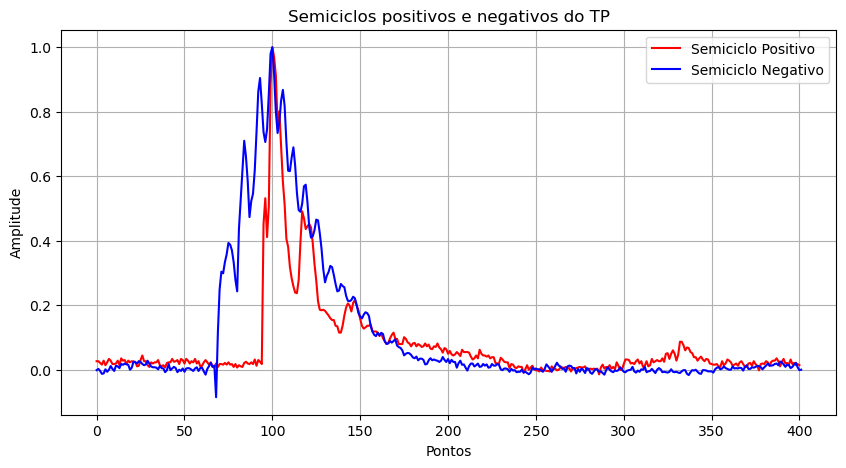

In [5]:
tp_processor.load_mat_file()
tp_processor.half_cycle(title="Semiciclos positivos e negativos do TP")

In [6]:
# Carrega vetores dos semiciclos positivos e negativos
TP_data_pos = tp_processor.data_pos[:, 2:]
TP_data_neg = tp_processor.data_neg[:, 2:]

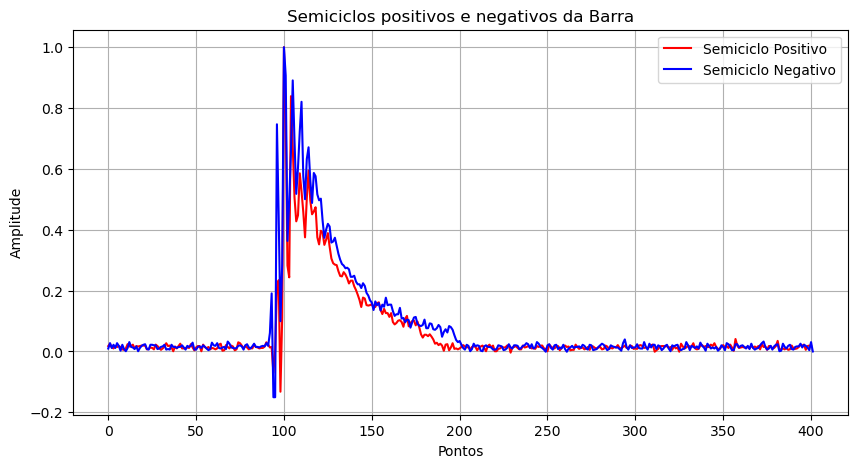

In [7]:
barra_folder_path = r"C:\Users\jmlnn\OneDrive\Engenharia\0. Pesquisa DP\Barra_limiar_30"
barra_processor = Processor(barra_folder_path)
barra_processor.list_mat_files()
barra_processor.load_mat_file()
barra_processor.half_cycle(title="Semiciclos positivos e negativos da Barra")

In [36]:
barra_data_pos = barra_processor.data_pos[:, 2:]
barra_data_neg = barra_processor.data_neg[:, 2:]
barra_data_pos.shape, barra_data_neg.shape

((29051, 401), (31987, 402))

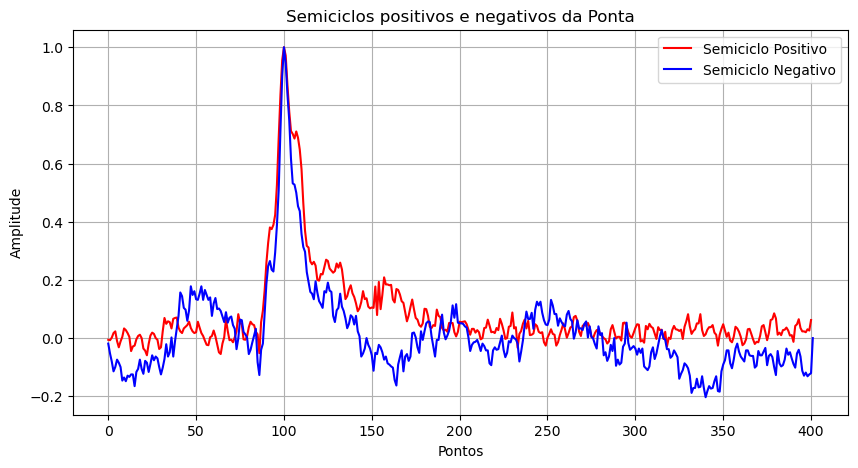

In [9]:
ponta_folder_path = r"C:\Users\jmlnn\OneDrive\Engenharia\0. Pesquisa DP\Ponta_ponta_limiar_50"
ponta_processor = Processor(ponta_folder_path)
ponta_processor.list_mat_files()
ponta_processor.load_mat_file()
ponta_processor.half_cycle(title="Semiciclos positivos e negativos da Ponta")

In [10]:
ponta_data_pos = ponta_processor.data_pos[:, 2:]
ponta_data_neg = ponta_processor.data_neg[:, 2:]

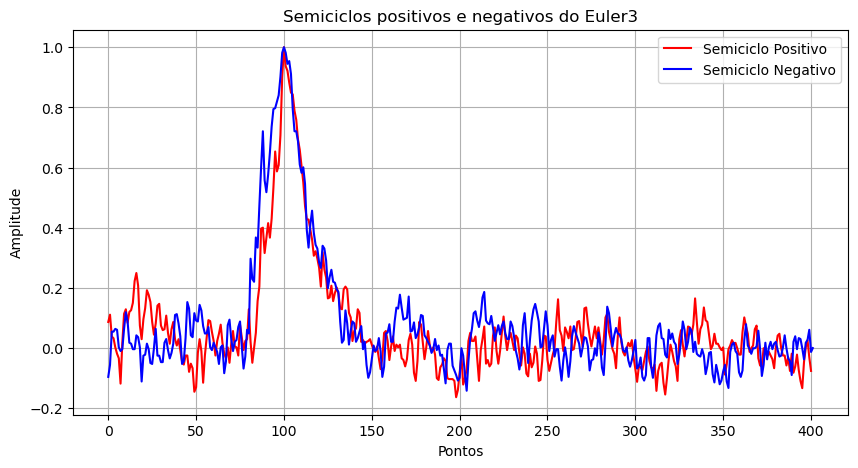

In [11]:
euler3_folder_path = r"C:\Users\jmlnn\OneDrive\Engenharia\0. Pesquisa DP\Euler_3_limiar_60"
euler3_processor = Processor(euler3_folder_path)
euler3_processor.list_mat_files()
euler3_processor.load_mat_file()
euler3_processor.half_cycle(title="Semiciclos positivos e negativos do Euler3")


In [32]:
euler_data_pos = euler3_processor.data_pos[:, 2:]
euler_data_neg = euler3_processor.data_neg[:, 2:]
euler_data_pos.shape

(5858, 401)

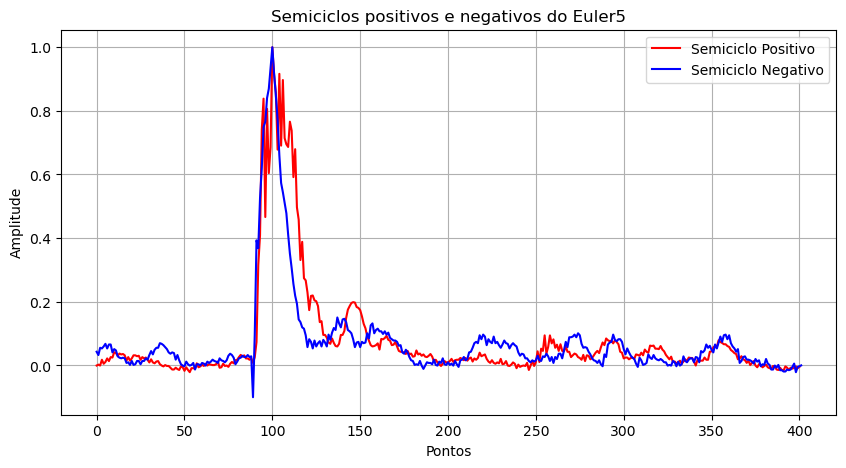

In [13]:
euler5_folder_path = r"C:\Users\jmlnn\OneDrive\Engenharia\0. Pesquisa DP\Euler_5_limiar_60"
euler5_processor = Processor(euler5_folder_path)
euler5_processor.list_mat_files()
euler5_processor.load_mat_file()
euler5_processor.half_cycle(title="Semiciclos positivos e negativos do Euler5")

In [14]:
euler5_data_pos = euler5_processor.data_pos[:, 2:]
euler5_data_neg = euler5_processor.data_neg[:, 2:]

In [15]:
class SignalMetrics:

    def __init__(self, pulses: np.ndarray):
        """
        Inicializa a classe com um array de pulsos.

        Args:
            pulses(ndarray): Array NumPy contendo valores dos pulsos.
        """

        if not isinstance(pulses, np.ndarray): # Validações de entrada
            raise TypeError("Pulses devem ser um array NumPy.")
        if pulses.size == 0:
            raise ValueError("Pulses não pode ser vazio.")
        
        self.pulses = pulses
        self._peak_value = None # prefixo _ indica que são variáveis internas (convenção Python)
        self._rms = None
        self._avg_amplitude = None

    @property # permite acessar o método como se fosse um atributo (sem parênteses)
    def peak_value(self) -> float:
        """Calcula e retorna o valor de pico do sinal"""
        if self._peak_value is None:
            self._peak_value = np.max(np.abs(self.pulses), axis=1)
        return self._peak_value
    
    @property
    def rms(self) -> float:
        """Calcula e retorna o valor RMS do sinal"""
        if self._rms is None:
            self._rms = np.sqrt(np.mean(self.pulses**2, axis=1))
        return self._rms
    
    @property
    def avg_amplitude(self) -> float:
        """Calcula e retorna a amplitude média de cada linha de pulsos"""
        if self._avg_amplitude is None:
            self._avg_amplitude = np.mean(np.abs(self.pulses), axis=1)
        return self._avg_amplitude
    
    @property
    def sqrt_amplitude(self) -> float:
        """Calcula e retorna a raiz quadrada da amplitude média da matriz"""
        return np.sqrt(self.avg_amplitude)

    def get_crest_factor(self) -> float:
        """Calcula e retorna o fator de crista da matriz"""
        return self.peak_value / self.rms
    
    def get_clearance_factor(self) -> float:
        """Calcula e retorna o fator de liberação da matriz"""
        return self.peak_value / self.sqrt_amplitude
    
    def impulse_factor(self) -> float:
        """Calcula e retorna o fator de impulso da matriz"""
        return self.peak_value / self.avg_amplitude
    
    def shape_factor(self) -> float:
        """Calcula e retorna o fator de forma da matriz"""
        return self.rms / self.avg_amplitude
    
    def skewness(self) -> float:
        """Calcula e retorna a assimetria da matriz"""
        return scipy.stats.skew(self.pulses, axis=1)    

    def kurtosis(self) -> float:
        """Calcula e retorna a curtose da matriz"""
        return scipy.stats.kurtosis(self.pulses, axis=1)

In [29]:
from sklearn.model_selection import train_test_split

TP_data_pos_train, TP_data_pos_test = train_test_split(TP_data_pos, test_size=0.3, random_state=42)
TP_data_neg_train, TP_data_neg_test = train_test_split(TP_data_neg, test_size=0.2, random_state=42)

barra_data_pos_train, barra_data_pos_test = train_test_split(barra_data_pos, test_size=0.3, random_state=42)
barra_data_neg_train, barra_data_neg_test = train_test_split(barra_data_neg, test_size=0.3, random_state=42)

ponta_data_pos_train, ponta_data_pos_test = train_test_split(ponta_data_pos, test_size=0.3, random_state=42)
ponta_data_neg_train, ponta_data_neg_test = train_test_split(ponta_data_neg, test_size=0.3, random_state=42)

euler_data_pos_train, euler_data_pos_test = train_test_split(euler_data_pos, test_size=0.3, random_state=42)
euler_data_neg_train, euler_data_neg_test = train_test_split(euler_data_neg, test_size=0.3, random_state=42)

euler5_data_pos_train, euler5_data_pos_test = train_test_split(euler5_data_pos, test_size=0.3, random_state=42)
euler5_data_neg_train, euler5_data_neg_test = train_test_split(euler5_data_neg, test_size=0.3, random_state=42)


In [ ]:
TP_data_pos_train_features = SignalMetrics(TP_data_pos_train)

TP_data_pos_train_features_array = np.array([
    TP_data_pos_train_features.peak_value,
    TP_data_pos_train_features.rms,
    TP_data_pos_train_features.avg_amplitude,
    TP_data_pos_train_features.sqrt_amplitude,
    TP_data_pos_train_features.get_crest_factor(),
    TP_data_pos_train_features.get_clearance_factor(),
    TP_data_pos_train_features.impulse_factor(),
    TP_data_pos_train_features.shape_factor(),
    TP_data_pos_train_features.skewness(),
    TP_data_pos_train_features.kurtosis()
]).T

TP_data_pos_features_test = SignalMetrics(TP_data_pos_test)

TP_data_pos_test_array = np.array([
    TP_data_pos_features_test.peak_value,
    TP_data_pos_features_test.rms,
    TP_data_pos_features_test.avg_amplitude,
    TP_data_pos_features_test.sqrt_amplitude,
    TP_data_pos_features_test.get_crest_factor(),
    TP_data_pos_features_test.get_clearance_factor(),
    TP_data_pos_features_test.impulse_factor(),
    TP_data_pos_features_test.shape_factor(),
    TP_data_pos_features_test.skewness(),
    TP_data_pos_features_test.kurtosis()
]).T

TP_data_pos_train_features_array.shape

In [59]:
TP_data_pos_train_com_rotulos = np.hstack((TP_data_pos_train_features_array,
                                           np.full((711, 1), "envelope +"),
                                           np.full((711, 1), "TP")))

TP_data_pos_train_com_rotulos

array([['1.0', '0.24586290996406182', '0.12818220243503065', ...,
        '4.2995032816114565', 'envelope +', 'TP'],
       ['1.0', '0.25171887218333117', '0.1183798160704109', ...,
        '3.872875702457214', 'envelope +', 'TP'],
       ['1.0', '0.24638183119139673', '0.1148196113717077', ...,
        '3.5109471434597186', 'envelope +', 'TP'],
       ...,
       ['1.0', '0.24269023649207963', '0.1279052335097585', ...,
        '4.245592179143151', 'envelope +', 'TP'],
       ['1.0', '0.26576721360026273', '0.1264109813840841', ...,
        '3.1460140022581173', 'envelope +', 'TP'],
       ['1.0', '0.2541935063565716', '0.12226948968432635', ...,
        '3.327584202760521', 'envelope +', 'TP']], dtype='<U32')

In [55]:
TP_data_neg_train_features = SignalMetrics(TP_data_neg_train)

TP_data_neg_train_features_array = np.array([
    TP_data_neg_train_features.peak_value,
    TP_data_neg_train_features.rms,
    TP_data_neg_train_features.avg_amplitude,
    TP_data_neg_train_features.sqrt_amplitude,
    TP_data_neg_train_features.get_crest_factor(),
    TP_data_neg_train_features.get_clearance_factor(),
    TP_data_neg_train_features.impulse_factor(),
    TP_data_neg_train_features.shape_factor(),
    TP_data_neg_train_features.skewness(),
    TP_data_neg_train_features.kurtosis()
]).T

TP_data_neg_test_features = SignalMetrics(TP_data_neg_test)

TP_data_neg_test_features_array = np.array([
    TP_data_neg_test_features.peak_value,
    TP_data_neg_test_features.rms,
    TP_data_neg_test_features.avg_amplitude,
    TP_data_neg_test_features.sqrt_amplitude,
    TP_data_neg_test_features.get_crest_factor(),
    TP_data_neg_test_features.get_clearance_factor(),
    TP_data_neg_test_features.impulse_factor(),
    TP_data_neg_test_features.shape_factor(),
    TP_data_neg_test_features.skewness(),
    TP_data_neg_test_features.kurtosis()
]).T

TP_data_neg_train_features_array.shape

(560, 10)

In [58]:
TP_data_neg_train_com_rotulos = np.hstack((TP_data_neg_train_features_array, 
                                           np.full((560, 1), "envelope -"), 
                                           np.full((560, 1), "TP")))

TP_data_neg_train_com_rotulos


array([['1.0', '0.27235611640954904', '0.15131879813238117', ...,
        '3.3307616260253248', 'envelope -', 'TP'],
       ['1.0', '0.24506687846162162', '0.11968450469907828', ...,
        '4.223294618194847', 'envelope -', 'TP'],
       ['1.0', '0.26367211168904336', '0.12963112315452885', ...,
        '3.297041826887499', 'envelope -', 'TP'],
       ...,
       ['1.0', '0.2514274336928638', '0.11523422208580968', ...,
        '3.972304131110686', 'envelope -', 'TP'],
       ['1.0', '0.23439752792945656', '0.11141426017158268', ...,
        '3.7640911921477462', 'envelope -', 'TP'],
       ['1.0', '0.24517439822466033', '0.11609901079494363', ...,
        '4.266806325998034', 'envelope -', 'TP']], dtype='<U32')

In [45]:
barra_data_pos_train_features = SignalMetrics(barra_data_pos_train)

barra_data_pos_train_features_array = np.array([
    barra_data_pos_train_features.peak_value,
    barra_data_pos_train_features.rms,
    barra_data_pos_train_features.avg_amplitude,
    barra_data_pos_train_features.sqrt_amplitude,
    barra_data_pos_train_features.get_crest_factor(),
    barra_data_pos_train_features.get_clearance_factor(),
    barra_data_pos_train_features.impulse_factor(),
    barra_data_pos_train_features.shape_factor(),
    barra_data_pos_train_features.skewness(),
    barra_data_pos_train_features.kurtosis()
]).T

barra_data_pos_test_features = SignalMetrics(barra_data_pos_test)

barra_data_pos_test_features_array = np.array([
    barra_data_pos_test_features.peak_value,
    barra_data_pos_test_features.rms,
    barra_data_pos_test_features.avg_amplitude,
    barra_data_pos_test_features.sqrt_amplitude,
    barra_data_pos_test_features.get_crest_factor(),
    barra_data_pos_test_features.get_clearance_factor(),
    barra_data_pos_test_features.impulse_factor(),
    barra_data_pos_test_features.shape_factor(),
    barra_data_pos_test_features.skewness(),
    barra_data_pos_test_features.kurtosis()
]).T

In [60]:
barra_data_neg_train_features = SignalMetrics(barra_data_neg_train)

barra_data_neg_train_features_array = np.array([
    barra_data_neg_train_features.peak_value,
    barra_data_neg_train_features.rms,
    barra_data_neg_train_features.avg_amplitude,
    barra_data_neg_train_features.sqrt_amplitude,
    barra_data_neg_train_features.get_crest_factor(),
    barra_data_neg_train_features.get_clearance_factor(),
    barra_data_neg_train_features.impulse_factor(),
    barra_data_neg_train_features.shape_factor(),
    barra_data_neg_train_features.skewness(),
    barra_data_neg_train_features.kurtosis()
]).T

barra_data_neg_test_features = SignalMetrics(barra_data_neg_test)

barra_data_neg_test_features_array = np.array([
    barra_data_neg_test_features.peak_value,
    barra_data_neg_test_features.rms,
    barra_data_neg_test_features.avg_amplitude,
    barra_data_neg_test_features.sqrt_amplitude,
    barra_data_neg_test_features.get_crest_factor(),
    barra_data_neg_test_features.get_clearance_factor(),
    barra_data_neg_test_features.impulse_factor(),
    barra_data_neg_test_features.shape_factor(),
    barra_data_neg_test_features.skewness(),
    barra_data_neg_test_features.kurtosis()
]).T

barra_data_pos_train_features_array.shape, barra_data_neg_train_features_array.shape

((20335, 10), (22390, 10))

In [65]:
barra_data_pos_com_rotulos = np.hstack((barra_data_pos_train_features_array,
                                           np.full((20335, 1), "envelope +"), 
                                           np.full((20335, 1), "Barra")))

barra_data_neg_train_com_rotulos = np.hstack((barra_data_neg_train_features_array,
                                             np.full((22390, 1), "envelope -"), 
                                             np.full((22390, 1), "Barra")))

In [ ]:
ponta_data_pos_train_features = SignalMetrics(ponta_data_pos_train)
ponta_data_pos_train_features_array = np.array([
    ponta_data_pos_train_features.peak_value,
    ponta_data_pos_train_features.rms,
    ponta_data_pos_train_features.avg_amplitude,
    ponta_data_pos_train_features.sqrt_amplitude,
    ponta_data_pos_train_features.get_crest_factor(),
    ponta_data_pos_train_features.get_clearance_factor(),
    ponta_data_pos_train_features.impulse_factor(),
    ponta_data_pos_train_features.shape_factor(),
    ponta_data_pos_train_features.skewness(),
    ponta_data_pos_train_features.kurtosis()
]).T

ponta_data_pos_test_features = SignalMetrics(ponta_data_pos_test)
ponta_data_pos_test_features_array = np.array([
    ponta_data_pos_test_features.peak_value,
    ponta_data_pos_test_features.rms,
    ponta_data_pos_test_features.avg_amplitude,
    ponta_data_pos_test_features.sqrt_amplitude,
    ponta_data_pos_test_features.get_crest_factor(),
    ponta_data_pos_test_features.get_clearance_factor(),
    ponta_data_pos_test_features.impulse_factor(),
    ponta_data_pos_test_features.shape_factor(),
    ponta_data_pos_test_features.skewness(),
    ponta_data_pos_test_features.kurtosis()
]).T

(4433, 10)

In [67]:
ponta_data_neg_train_features = SignalMetrics(ponta_data_neg_train)
ponta_data_neg_train_features_array = np.array([
    ponta_data_neg_train_features.peak_value,
    ponta_data_neg_train_features.rms,
    ponta_data_neg_train_features.avg_amplitude,
    ponta_data_neg_train_features.sqrt_amplitude,
    ponta_data_neg_train_features.get_crest_factor(),
    ponta_data_neg_train_features.get_clearance_factor(),
    ponta_data_neg_train_features.impulse_factor(),
    ponta_data_neg_train_features.shape_factor(),
    ponta_data_neg_train_features.skewness(),
    ponta_data_neg_train_features.kurtosis()
]).T

ponta_data_neg_test_features = SignalMetrics(ponta_data_neg_test)
ponta_data_neg_test_features_array = np.array([
    ponta_data_neg_test_features.peak_value,
    ponta_data_neg_test_features.rms,
    ponta_data_neg_test_features.avg_amplitude,
    ponta_data_neg_test_features.sqrt_amplitude,
    ponta_data_neg_test_features.get_crest_factor(),
    ponta_data_neg_test_features.get_clearance_factor(),
    ponta_data_neg_test_features.impulse_factor(),
    ponta_data_neg_test_features.shape_factor(),
    ponta_data_neg_test_features.skewness(),
    ponta_data_neg_test_features.kurtosis()
]).T

ponta_data_pos_train_features_array.shape, ponta_data_neg_train_features_array.shape

((4433, 10), (5072, 10))

In [68]:
ponta_data_pos_train_com_rotulos = np.hstack((ponta_data_pos_train_features_array,
                                             np.full((4433, 1), "envelope +"), 
                                             np.full((4433, 1), "Ponta")))

ponta_data_neg_train_com_rotulos = np.hstack((ponta_data_neg_train_features_array,
                                                np.full((5072, 1), "envelope -"), 
                                                np.full((5072, 1), "Ponta")))

In [69]:
euler_data_pos_train_features = SignalMetrics(euler_data_pos_train)
euler_data_pos_train_features_array = np.array([
    euler_data_pos_train_features.peak_value,
    euler_data_pos_train_features.rms,
    euler_data_pos_train_features.avg_amplitude,
    euler_data_pos_train_features.sqrt_amplitude,
    euler_data_pos_train_features.get_crest_factor(),
    euler_data_pos_train_features.get_clearance_factor(),
    euler_data_pos_train_features.impulse_factor(),
    euler_data_pos_train_features.shape_factor(),
    euler_data_pos_train_features.skewness(),
    euler_data_pos_train_features.kurtosis()
]).T

euler_data_pos_test_features = SignalMetrics(euler_data_pos_test)
euler_data_pos_test_features_array = np.array([
    euler_data_pos_test_features.peak_value,
    euler_data_pos_test_features.rms,
    euler_data_pos_test_features.avg_amplitude,
    euler_data_pos_test_features.sqrt_amplitude,
    euler_data_pos_test_features.get_crest_factor(),
    euler_data_pos_test_features.get_clearance_factor(),
    euler_data_pos_test_features.impulse_factor(),
    euler_data_pos_test_features.shape_factor(),
    euler_data_pos_test_features.skewness(),
    euler_data_pos_test_features.kurtosis()
]).T

euler_data_neg_train_features = SignalMetrics(euler_data_neg_train)
euler_data_neg_train_features_array = np.array([
    euler_data_neg_train_features.peak_value,
    euler_data_neg_train_features.rms,
    euler_data_neg_train_features.avg_amplitude,
    euler_data_neg_train_features.sqrt_amplitude,
    euler_data_neg_train_features.get_crest_factor(),
    euler_data_neg_train_features.get_clearance_factor(),
    euler_data_neg_train_features.impulse_factor(),
    euler_data_neg_train_features.shape_factor(),
    euler_data_neg_train_features.skewness(),
    euler_data_neg_train_features.kurtosis()
]).T

euler_data_neg_test_features = SignalMetrics(euler_data_neg_test)
euler_data_neg_test_features_array = np.array([
    euler_data_neg_test_features.peak_value,
    euler_data_neg_test_features.rms,
    euler_data_neg_test_features.avg_amplitude,
    euler_data_neg_test_features.sqrt_amplitude,
    euler_data_neg_test_features.get_crest_factor(),
    euler_data_neg_test_features.get_clearance_factor(),
    euler_data_neg_test_features.impulse_factor(),
    euler_data_neg_test_features.shape_factor(),
    euler_data_neg_test_features.skewness(),
    euler_data_neg_test_features.kurtosis()
]).T

euler_data_pos_train_features_array.shape, euler_data_neg_train_features_array.shape

((4100, 10), (3931, 10))

In [70]:
euler_data_pos_train_com_rotulos = np.hstack((euler_data_pos_train_features_array,
                                                np.full((4100, 1), "envelope +"), 
                                                np.full((4100, 1), "Euler3")))

euler_data_neg_train_com_rotulos = np.hstack((euler_data_neg_train_features_array,
                                                np.full((3931, 1), "envelope -"), 
                                                np.full((3931, 1), "Euler3")))
                                              
                                    

In [71]:
euler5_data_pos_train_features = SignalMetrics(euler5_data_pos_train)
euler5_data_pos_train_features_array = np.array([
    euler5_data_pos_train_features.peak_value,
    euler5_data_pos_train_features.rms,
    euler5_data_pos_train_features.avg_amplitude,
    euler5_data_pos_train_features.sqrt_amplitude,
    euler5_data_pos_train_features.get_crest_factor(),
    euler5_data_pos_train_features.get_clearance_factor(),
    euler5_data_pos_train_features.impulse_factor(),
    euler5_data_pos_train_features.shape_factor(),
    euler5_data_pos_train_features.skewness(),
    euler5_data_pos_train_features.kurtosis()
]).T

euler5_data_pos_test_features = SignalMetrics(euler5_data_pos_test)
euler5_data_pos_test_features_array = np.array([
    euler5_data_pos_test_features.peak_value,
    euler5_data_pos_test_features.rms,
    euler5_data_pos_test_features.avg_amplitude,
    euler5_data_pos_test_features.sqrt_amplitude,
    euler5_data_pos_test_features.get_crest_factor(),
    euler5_data_pos_test_features.get_clearance_factor(),
    euler5_data_pos_test_features.impulse_factor(),
    euler5_data_pos_test_features.shape_factor(),
    euler5_data_pos_test_features.skewness(),
    euler5_data_pos_test_features.kurtosis()
]).T

euler5_data_neg_train_features = SignalMetrics(euler5_data_neg_train)
euler5_data_neg_train_features_array = np.array([
    euler5_data_neg_train_features.peak_value,
    euler5_data_neg_train_features.rms,
    euler5_data_neg_train_features.avg_amplitude,
    euler5_data_neg_train_features.sqrt_amplitude,
    euler5_data_neg_train_features.get_crest_factor(),
    euler5_data_neg_train_features.get_clearance_factor(),
    euler5_data_neg_train_features.impulse_factor(),
    euler5_data_neg_train_features.shape_factor(),
    euler5_data_neg_train_features.skewness(),
    euler5_data_neg_train_features.kurtosis()
]).T

euler5_data_neg_test_features = SignalMetrics(euler5_data_neg_test)
euler5_data_neg_test_features_array = np.array([
    euler5_data_neg_test_features.peak_value,
    euler5_data_neg_test_features.rms,
    euler5_data_neg_test_features.avg_amplitude,
    euler5_data_neg_test_features.sqrt_amplitude,
    euler5_data_neg_test_features.get_crest_factor(),
    euler5_data_neg_test_features.get_clearance_factor(),
    euler5_data_neg_test_features.impulse_factor(),
    euler5_data_neg_test_features.shape_factor(),
    euler5_data_neg_test_features.skewness(),
    euler5_data_neg_test_features.kurtosis()
]).T

euler5_data_pos_train_features_array.shape, euler5_data_neg_train_features_array.shape

((3224, 10), (3187, 10))

In [72]:
euler5_data_pos_train_com_rotulos = np.hstack((euler5_data_pos_train_features_array,
                                                np.full((3224, 1), "envelope +"), 
                                                np.full((3224, 1), "Euler5")))

euler5_data_neg_train_com_rotulos = np.hstack((euler5_data_neg_train_features_array,
                                                np.full((3187, 1), "envelope -"), 
                                                np.full((3187, 1), "Euler5")))